# Top Stocks Prediction

In [1]:
pip install yahoo-fin

     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 92kB 7.2MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 81kB 6.9MB/s 
  Created wheel for parse: filename=parse-1.19.0-cp37-none-any.whl size=24581 sha256=9d115d0da4a9268eb262e367aeaecb50db0ed3d0d8910d6b6663d73ceebc5071
  Stored in directory: /root/.cache/pip/wheels/c0/39/ea/e2fd678bd130953f5438470b8dfa529f00787e9b8b92b27467
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=fbd2a91708007dc891e23ca2add8d79f8243f057aa72fa45a0284fca08feee87
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-cp37-none-any.whl size=6067 sha256=dd971a562469f1d73ca000d156604e2c045a8ab6d750d69bb4eb1bc3202741a4
  Stored in directory: /root/.cache/pip/wheels/f1/80/5a/444ba08a550cdd241bd9baf8bae44be750efe370

In [2]:
pip install yfinance

     |████████████████████████████████| 5.5MB 13.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=27d15fff7fdf12526f3e029350e8c4ed376f6e1474c11e1644f99647909c7bb6
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
# Imports
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
yf.pdr_override()

In [4]:
# get list of Dow stocks
#dow_list = si.tickers_dow()
 
# get list of NASDAQ stocks
#nasdaq_list = si.tickers_nasdaq()

# get list of S&P 500 stocks
sp500_list = si.tickers_sp500() 

In [5]:
#print(len(dow_list))
#print(len(nasdaq_list))
print(len(sp500_list))

505


In [6]:
#dow_list = [item.replace(".", "-") for item in dow_list] # Yahoo Finance uses dashes instead of dots
#nasdaq_list = [item.replace(".", "-") for item in nasdaq_list]
sp500_list = [item.replace(".", "-") for item in sp500_list]

In [7]:
tickers =  sp500_list # + nasdaq_list

In [8]:
len(tickers)

505

In [9]:
tickers[:5]

['A', 'AAL', 'AAP', 'AAPL', 'ABBV']

In [10]:
# Variables
index_name = list(['^GSPC','^DJI']) # S&P 500, Dow Jones, Nasdaq , '^IXIC'
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()
exportList = pd.DataFrame(columns=['Stock', "RS_Rating", "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"])
returns_multiples = []

In [11]:
# Index Returns
index_df = pdr.get_data_yahoo(index_name, start_date, end_date)
index_df

[*********************100%***********************]  2 of 2 completed


Adj Close               ...   Volume            
                    ^DJI        ^GSPC  ...     ^DJI       ^GSPC
Date                                   ...                     
2020-03-09  23851.019531  2746.560059  ...  7504300  8423050000
2020-03-10  25018.160156  2882.229980  ...  6548600  7635960000
2020-03-11  23553.220703  2741.379883  ...  6639600  7374110000
2020-03-12  21200.619141  2480.639893  ...  9082600  8829380000
2020-03-13  23185.619141  2711.020020  ...  8430800  8258670000
...                  ...          ...  ...      ...         ...
2021-03-01  31535.509766  3901.820068  ...  3856700  5071540000
2021-03-02  31391.519531  3870.290039  ...  3372700  5493690000
2021-03-03  31270.089844  3819.719971  ...  4096600  6150790000
2021-03-04  30924.140625  3768.469971  ...  5378500  7142240000
2021-03-05  31496.300781  3841.939941  ...  5018100  6842570000

[251 rows x 12 columns]

In [12]:
index_df[['Percent Change_DJI','Percent Change_GSPC']] = index_df['Adj Close'].pct_change()
index_df #,'Percent Change_IXIC'

Adj Close               ... Percent Change_DJI Percent Change_GSPC
                    ^DJI        ^GSPC  ...                                       
Date                                   ...                                       
2020-03-09  23851.019531  2746.560059  ...                NaN                 NaN
2020-03-10  25018.160156  2882.229980  ...           0.048935            0.049396
2020-03-11  23553.220703  2741.379883  ...          -0.058555           -0.048868
2020-03-12  21200.619141  2480.639893  ...          -0.099884           -0.095113
2020-03-13  23185.619141  2711.020020  ...           0.093629            0.092871
...                  ...          ...  ...                ...                 ...
2021-03-01  31535.509766  3901.820068  ...           0.019499            0.023791
2021-03-02  31391.519531  3870.290039  ...          -0.004566           -0.008081
2021-03-03  31270.089844  3819.719971  ...          -0.003868           -0.013066
2021-03-04  30924.140625  3768.469971  ...          -0.011063           -0.013417
2021-03-05  31496.300781  3841.939941  ...           0.018502            0.019496

[251 rows x 14 columns]

In [13]:
#index_return_DJI = (index_df['Percent Change_DJI'] + 1).cumprod()[-1]
#index_return_DJI

In [14]:
index_return_GSPC = (index_df['Percent Change_GSPC'] + 1).cumprod()[-1]
index_return_GSPC

1.3988188349951256

In [15]:
#index_return__IXIC = (index_df['Percent Change_IXIC'] + 1).cumprod()[-1]
#index_return__IXIC

In [16]:
m = {}
pc = {}
sr = {}

In [17]:
def calc_return(tickers,index_return,index_name):
      for ticker in tickers:
              # Download historical data as CSV for each stock (makes the process faster)
              df = pdr.get_data_yahoo(ticker, start_date, end_date)
              df.to_csv(f'{ticker}.csv')

              # Calculating returns relative to the market (returns multiple)
              df['Percent Change'] = df['Adj Close'].pct_change()
              stock_return = (df['Percent Change'] + 1).cumprod()[-1]
    
              returns_multiple = round((stock_return / index_return), 2)
              returns_multiples.extend([returns_multiple])
    
              print (f'Ticker: {ticker}; Returns Multiple against {index_name}: {returns_multiple}\n')
              m[ticker] = returns_multiple
              pc[ticker] = stock_return
              sr[ticker] = df['Percent Change']


In [18]:
#calc_return(dow_list, index_return_DJI, "Dow Jones")
#calc_return(nasdaq_list, index_return__IXIC, "NASDAQ")
calc_return(sp500_list, index_return_GSPC, "S&P500")

[*********************100%***********************]  1 of 1 completed
Ticker: A; Returns Multiple against S&P500: 1.18

[*********************100%***********************]  1 of 1 completed
Ticker: AAL; Returns Multiple against S&P500: 0.99

[*********************100%***********************]  1 of 1 completed
Ticker: AAP; Returns Multiple against S&P500: 0.95

[*********************100%***********************]  1 of 1 completed
Ticker: AAPL; Returns Multiple against S&P500: 1.31

[*********************100%***********************]  1 of 1 completed
Ticker: ABBV; Returns Multiple against S&P500: 0.94

[*********************100%***********************]  1 of 1 completed
Ticker: ABC; Returns Multiple against S&P500: 0.92

[*********************100%***********************]  1 of 1 completed
Ticker: ABMD; Returns Multiple against S&P500: 1.38

[*********************100%***********************]  1 of 1 completed
Ticker: ABT; Returns Multiple against S&P500: 1.11

[*********************100%*****

In [19]:
import csv
with open('return_multiple.csv', 'w') as f:
    for key in m.keys():
        f.write("%s,%s\n"%(key,m[key]))

In [20]:
with open('percent_change.csv', 'w') as f:
    for key in pc.keys():
        f.write("%s,%s\n"%(key,pc[key]))

In [21]:
with open('stock_return.csv', 'w') as f:
    for key in sr.keys():
        f.write("%s,%s\n"%(key,sr[key]))

In [22]:
# Creating dataframe of only top 10%
rs_df = pd.DataFrame(list(zip(tickers, returns_multiples)), columns=['Ticker', 'Returns_multiple'])
rs_df['RS_Rating'] = rs_df.Returns_multiple.rank(pct=True) * 100
rs_df = rs_df[rs_df.RS_Rating >= rs_df.RS_Rating.quantile(.90)]

In [23]:
rs_df  # top 10%

Ticker  Returns_multiple   RS_Rating
23    ALGN              1.77   96.230159
28    AMAT              1.58   93.253968
33     AMP              1.49   90.575397
41     APA              1.76   96.031746
44    APTV              1.52   91.666667
77    CARR              2.22   98.214286
78     CAT              1.56   92.757937
84    CDNS              1.52   91.666667
116   CTLT              1.70   95.337302
124     DD              1.54   92.162698
125     DE              1.70   95.337302
132  DISCA              1.94   97.619048
133  DISCK              1.68   94.940476
138    DOW              1.56   92.757937
145    DVN              2.32   98.412698
155    EMN              1.71   95.634921
157   ENPH              2.37   98.809524
165   ETSY              2.45   99.107143
172      F              1.49   90.575397
173   FANG              2.35   98.611111
177    FCX              3.04   99.801587
178    FDX              1.61   93.650794
183   FITB              1.51   91.269841
200     GM              1.56   92.757937
205    GPS              1.66   94.543651
209    HAL              2.11   97.817460
215    HES              1.66   94.543651
244     IR              1.52   91.666667
249    IVZ              1.54   92.162698
270     LB              1.93   97.420635
283   LRCX              1.49   90.575397
301    MGM              1.49   90.575397
310    MOS              1.82   97.023810
312   MPWR              1.62   93.849206
314    MRO              2.58   99.404762
315     MS              1.59   93.452381
343    NWS              1.63   94.146825
344   NWSA              1.75   95.833333
352    OXY              1.79   96.428571
364     PH              1.49   90.575397
381    PWR              1.80   96.626984
382    PXD              1.81   96.825397
383   PYPL              1.68   94.940476
390     RF              1.49   90.575397
403   SCHW              1.56   92.757937
406   SIVB              2.45   99.107143
437    TPR              1.63   94.146825
442   TSLA              3.52  100.000000
460    URI              2.17   98.015873
465   VIAC              2.88   99.603175
502   ZBRA              1.85   97.222222

In [24]:
rs_stocks = rs_df['Ticker']

In [25]:
# Checking Minervini conditions of top 10% of stocks in given list
for stock in rs_stocks:    
    try:
        df = pd.read_csv(f'{stock}.csv', index_col=0)
        sma = [50, 150, 200]  # simple moving average
        for x in sma:
            df["SMA_"+str(x)] = round(df['Adj Close'].rolling(window=x).mean(), 2)  # calculating sma 
        
        # Storing required values 
        currentClose = df["Adj Close"][-1]
        moving_average_50 = df["SMA_50"][-1]
        moving_average_150 = df["SMA_150"][-1]
        moving_average_200 = df["SMA_200"][-1]
        low_of_52week = round(min(df["Low"][-260:]), 2)  # 5 days a week
        high_of_52week = round(max(df["High"][-260:]), 2)
        RS_Rating = round(rs_df[rs_df['Ticker']==stock].RS_Rating.tolist()[0])
        
        try:
            moving_average_200_20 = df["SMA_200"][-20]
        except Exception:
            moving_average_200_20 = 0

        # Condition 1: Current Price > 150 SMA and > 200 SMA
        condition_1 = currentClose > moving_average_150 > moving_average_200
        
        # Condition 2: 150 SMA and > 200 SMA
        condition_2 = moving_average_150 > moving_average_200

        # Condition 3: 200 SMA trending up for at least 1 month
        condition_3 = moving_average_200 > moving_average_200_20
        
        # Condition 4: 50 SMA > 150 SMA and 50 SMA> 200 SMA
        condition_4 = moving_average_50 > moving_average_150 > moving_average_200
           
        # Condition 5: Current Price > 50 SMA
        condition_5 = currentClose > moving_average_50
           
        # Condition 6: Current Price is at least 30% above 52 week low
        condition_6 = currentClose >= (1.3*low_of_52week)
           
        # Condition 7: Current Price is within 25% of 52 week high
        condition_7 = currentClose >= (.75*high_of_52week)
        
        # If all conditions above are true, add stock to exportList
        if(condition_1 and condition_2 and condition_3 and condition_4 and condition_5 and condition_6 and condition_7):
            exportList = exportList.append({'Stock': stock, "RS_Rating": RS_Rating ,"50 Day MA": moving_average_50, "150 Day Ma": moving_average_150, "200 Day MA": moving_average_200, "52 Week Low": low_of_52week, "52 week High": high_of_52week}, ignore_index=True)
            print (stock + " made the Minervini requirements")
    except Exception as e:
        print (e)
        print(f"Could not gather data on {stock}")

AMAT made the Minervini requirements
AMP made the Minervini requirements
APA made the Minervini requirements
APTV made the Minervini requirements
CAT made the Minervini requirements
DE made the Minervini requirements
DISCA made the Minervini requirements
DISCK made the Minervini requirements
DOW made the Minervini requirements
DVN made the Minervini requirements
EMN made the Minervini requirements
F made the Minervini requirements
FANG made the Minervini requirements
FCX made the Minervini requirements
FDX made the Minervini requirements
FITB made the Minervini requirements
GM made the Minervini requirements
GPS made the Minervini requirements
HAL made the Minervini requirements
HES made the Minervini requirements
IR made the Minervini requirements
IVZ made the Minervini requirements
LB made the Minervini requirements
LRCX made the Minervini requirements
MGM made the Minervini requirements
MOS made the Minervini requirements
MRO made the Minervini requirements
MS made the Minervini req

In [26]:
exportList = exportList.sort_values(by='RS_Rating', ascending=False)
print('\n', exportList)
writer = ExcelWriter("ScreenOutput.xlsx")
exportList.to_excel(writer, "Sheet1")
writer.save()


     Stock RS_Rating  50 Day MA  ...  200 Day MA  52 Week Low  52 week High
13    FCX       100      30.75  ...       19.57         4.82         39.10
38   VIAC       100      51.23  ...       33.47        10.10         74.76
12   FANG        99      61.79  ...       43.96        14.55         88.75
26    MRO        99       8.61  ...        6.21         3.02         13.29
35   SIVB        99     466.58  ...      313.53       127.39        550.40
37    URI        98     264.19  ...      200.66        58.85        321.94
6   DISCA        98      42.04  ...       27.55        17.12         64.90
18    HAL        98      20.06  ...       15.76         4.25         23.90
9     DVN        98      18.97  ...       13.16         4.70         26.13
22     LB        97      46.19  ...       32.09         8.00         57.63
31    PWR        97      76.16  ...       58.06        23.77         87.67
32    PXD        97     130.53  ...      104.72        48.62        165.54
39   ZBRA        97    

# Fetching Data

In [27]:
ticker_list= exportList['Stock']
ticker_list = ticker_list[:10]

In [28]:
ticker_list

13      FCX
38     VIAC
12     FANG
26      MRO
35     SIVB
37      URI
6     DISCA
18      HAL
9       DVN
22       LB
Name: Stock, dtype: object

In [29]:
#Interval required 5 minutes
data = yf.download(tickers=list(ticker_list), period='1y', interval='1d')
data

[*********************100%***********************]  10 of 10 completed


Adj Close                        ...   Volume                   
                DISCA        DVN       FANG  ...     SIVB      URI      VIAC
Date                                         ...                            
2020-03-06  25.440001  12.587308  46.890713  ...   967900  2691400  14435200
2020-03-09  23.650000   7.880013  25.955980  ...  1554200  3339800  14525100
2020-03-10  25.080000   8.482548  28.659727  ...  1297700  2642200  14906800
2020-03-11  24.059999   7.917673  25.299356  ...  1129900  2691200  15620200
2020-03-12  22.280001   6.918446  24.739294  ...  1315000  3399200  21431500
...               ...        ...        ...  ...      ...      ...       ...
2021-03-01  58.180000  22.400000  73.245079  ...   452200   696000  13425700
2021-03-02  59.240002  22.480000  70.610001  ...   233500   694800  14415500
2021-03-03  61.450001  22.690001  74.440002  ...   273700   644500  17459600
2021-03-04  62.599998  23.620001  81.260002  ...   353800  1179900  21479500
2021-03-05  64.250000  25.610001  85.269997  ...   466800   733300  14158600

[252 rows x 60 columns]

In [30]:
data.columns[:]

MultiIndex([('Adj Close', 'DISCA'),
            ('Adj Close',   'DVN'),
            ('Adj Close',  'FANG'),
            ('Adj Close',   'FCX'),
            ('Adj Close',   'HAL'),
            ('Adj Close',    'LB'),
            ('Adj Close',   'MRO'),
            ('Adj Close',  'SIVB'),
            ('Adj Close',   'URI'),
            ('Adj Close',  'VIAC'),
            (    'Close', 'DISCA'),
            (    'Close',   'DVN'),
            (    'Close',  'FANG'),
            (    'Close',   'FCX'),
            (    'Close',   'HAL'),
            (    'Close',    'LB'),
            (    'Close',   'MRO'),
            (    'Close',  'SIVB'),
            (    'Close',   'URI'),
            (    'Close',  'VIAC'),
            (     'High', 'DISCA'),
            (     'High',   'DVN'),
            (     'High',  'FANG'),
            (     'High',   'FCX'),
            (     'High',   'HAL'),
            (     'High',    'LB'),
            (     'High',   'MRO'),
            (     'High',  '

## Modelling by LSTM

In [31]:
num_companies = 10
look_back = 15
forward_days = 5
num_periods = 1

In [32]:
data.columns.levels

FrozenList([['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['DISCA', 'DVN', 'FANG', 'FCX', 'HAL', 'LB', 'MRO', 'SIVB', 'URI', 'VIAC']])

In [33]:
companies_names = list(ticker_list)
colors = ['r','g','c','m','y','k','w','b'] #from matplotlib

In [34]:
f = '/content/' + companies_names[0] + '.csv'
df_A = pd.read_csv(f)
df_A['Date'] = pd.to_datetime(df_A['Date'])

f = '/content/' + companies_names[1] + '.csv'
df_B = pd.read_csv(f)
df_B['Date'] = pd.to_datetime(df_B['Date'])

f = '/content/' + companies_names[2] + '.csv'
df_C = pd.read_csv(f)
df_C['Date'] = pd.to_datetime(df_C['Date'])

f = '/content/' + companies_names[3] + '.csv'
df_D = pd.read_csv(f)
df_D['Date'] = pd.to_datetime(df_D['Date'])

f = '/content/' + companies_names[4] + '.csv'
df_E = pd.read_csv(f)
df_E['Date'] = pd.to_datetime(df_E['Date'])

f = '/content/' + companies_names[5] + '.csv'
df_F = pd.read_csv(f)
df_F['Date'] = pd.to_datetime(df_F['Date'])

f = '/content/' + companies_names[6] + '.csv'
df_G = pd.read_csv(f)
df_G['Date'] = pd.to_datetime(df_G['Date'])

f = '/content/' + companies_names[7] + '.csv'
df_H = pd.read_csv(f)
df_H['Date'] = pd.to_datetime(df_H['Date'])

f = '/content/' + companies_names[8] + '.csv'
df_I = pd.read_csv(f)
df_I['Date'] = pd.to_datetime(df_I['Date'])

f = '/content/' + companies_names[9] + '.csv'
df_J = pd.read_csv(f)
df_J['Date'] = pd.to_datetime(df_J['Date'])

In [35]:
companies = [df_A, df_B, df_C, df_D, df_E, df_F, df_G, df_H, df_I, df_J]

for comapany in companies:
    comapany.set_index('Date', inplace=True)
    comapany.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [36]:
print(len(df_A))
print(len(df_B))
print(len(df_C))
print(len(df_D))

251
251
251
251


### Data visualization

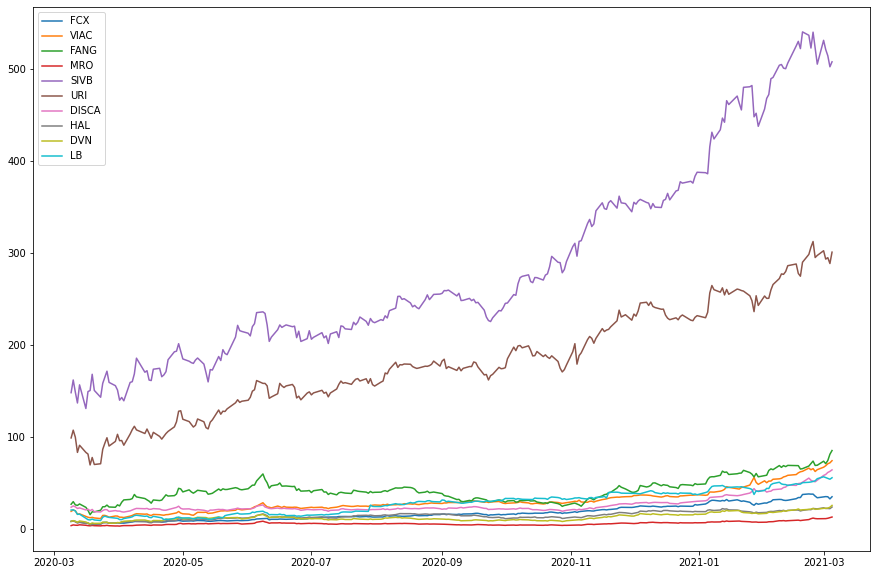

In [37]:
plt.figure(figsize = (15,10))

plt.plot(df_A, label=companies_names[0])
plt.plot(df_B, label=companies_names[1])
plt.plot(df_C, label=companies_names[2])
plt.plot(df_D, label=companies_names[3])
plt.plot(df_E, label=companies_names[4])
plt.plot(df_F, label=companies_names[5])
plt.plot(df_G, label=companies_names[6])
plt.plot(df_H, label=companies_names[7])
plt.plot(df_I, label=companies_names[8])
plt.plot(df_J, label=companies_names[9])


plt.legend(loc='best')
plt.show()

### Data normalization

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scl = MinMaxScaler()
args = [company.values.reshape(company.shape[0],1) for company in companies]

In [40]:
array = scl.fit_transform(np.concatenate((args[0],args[1],args[2],args[3],args[4],args[5],args[6],args[7],args[8],args[9]), axis=1))

## Applying LSTM

In [41]:
#split in Train and Test

division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [42]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, foward_days,num_companies,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -foward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+foward_days)])
    return np.array(X),np.array(Y)

In [43]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days,num_companies)
y = np.array([list(x.ravel()) for x in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(181, 15, 10)
(46, 15, 10)
(1, 15, 10)
(181, 50)
(46, 50)
(1, 50)


In [45]:
# load trained model
#model = load_model('Trained/single-company/LSTM_compA_LB40_FD10_E50_F50_S30.h5')

In [46]:
NUM_NEURONS_FirstLayer = 200
NUM_NEURONS_SecondLayer = 100
EPOCHS = 20

In [47]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [48]:
#Build the model
model = Sequential()

model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,num_companies), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days * num_companies))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=1, verbose=2)

Epoch 1/20
181/181 - 35s - loss: 0.0118 - val_loss: 0.0084
Epoch 2/20
181/181 - 1s - loss: 0.0068 - val_loss: 0.0036
Epoch 3/20
181/181 - 1s - loss: 0.0050 - val_loss: 0.0034
Epoch 4/20
181/181 - 1s - loss: 0.0041 - val_loss: 0.0034
Epoch 5/20
181/181 - 1s - loss: 0.0040 - val_loss: 0.0036
Epoch 6/20
181/181 - 1s - loss: 0.0033 - val_loss: 0.0023
Epoch 7/20
181/181 - 1s - loss: 0.0030 - val_loss: 0.0022
Epoch 8/20
181/181 - 1s - loss: 0.0029 - val_loss: 0.0031
Epoch 9/20
181/181 - 1s - loss: 0.0033 - val_loss: 0.0019
Epoch 10/20
181/181 - 1s - loss: 0.0027 - val_loss: 0.0019
Epoch 11/20
181/181 - 1s - loss: 0.0029 - val_loss: 0.0022
Epoch 12/20
181/181 - 1s - loss: 0.0022 - val_loss: 0.0021
Epoch 13/20
181/181 - 1s - loss: 0.0030 - val_loss: 0.0020
Epoch 14/20
181/181 - 1s - loss: 0.0021 - val_loss: 0.0017
Epoch 15/20
181/181 - 1s - loss: 0.0027 - val_loss: 0.0022
Epoch 16/20
181/181 - 1s - loss: 0.0021 - val_loss: 0.0026
Epoch 17/20
181/181 - 1s - loss: 0.0021 - val_loss: 0.0022
Epoch

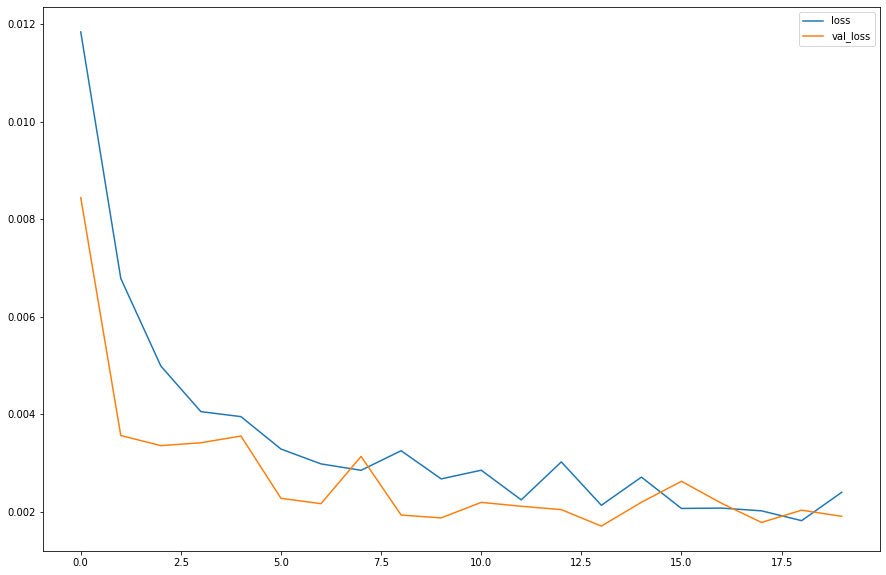

In [49]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [50]:
#Saving the model
file_name = 'model5.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))

Saved model `model5.h5` to disk


## Predicting the Test Set to see the results

In [51]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

Xt = model.predict(X_test)
Xt.shape

(1, 50)

In [52]:
Xt.shape

(1, 50)

In [53]:
y_test.shape

(1, 50)

In [54]:
print("Evaluate")
result = model.evaluate(X_test,y_test,verbose=1)
result  #mse-------------------model accuracy

Evaluate
1/1 [==============================] - 1s 563ms/step - loss: 0.0225


0.02248992770910263

In [55]:
Xt.shape

(1, 50)

In [56]:
y_test.shape

(1, 50)

In [57]:
def do_inverse_transform(output_result,num_companies = 10):
    #From input/output nootbook: apply makeup, use scl.inverse_transform and remove makeup
    
    #transform to input shape
    original_matrix_format = []
    for result in output_result:
        #do inverse transform
        original_matrix_format.append(scl.inverse_transform([result[x:x+num_companies] for x in range(0, len(result), num_companies)]))
    original_matrix_format = np.array(original_matrix_format)
    
    #restore to original shape
    for i in range(len(original_matrix_format)):
        output_result[i] = original_matrix_format[i].ravel()

    return output_result

In [58]:
def prediction_by_step_by_company(raw_model_output, num_companies):
    matrix_prediction = []
    for i in range(0,num_companies):
        matrix_prediction.append([[lista[j] for j in range(i,len(lista),num_companies)] for lista in raw_model_output])
    return np.array(matrix_prediction)

In [59]:
Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(10, 1, 5)

In [60]:
def target_by_company(raw_model_output, num_companies):
    matrix_target = [[] for x in range(num_companies)]
    
    for output in raw_model_output:
        for i in range (num_companies):
            for j in range(0,len(output),num_companies):
                matrix_target[i].append(output[i+j])
    return np.array(matrix_target)

In [61]:
Yt = do_inverse_transform(y_test)

MT = target_by_company(Yt, num_companies)
MT.shape

(10, 5)

In [62]:
MT.shape

(10, 5)

In [63]:
MP.shape

(10, 1, 5)

### Graphs

In [64]:
colors = ['r', 'g', 'c', 'm', 'y', 'k', 'w', 'b']

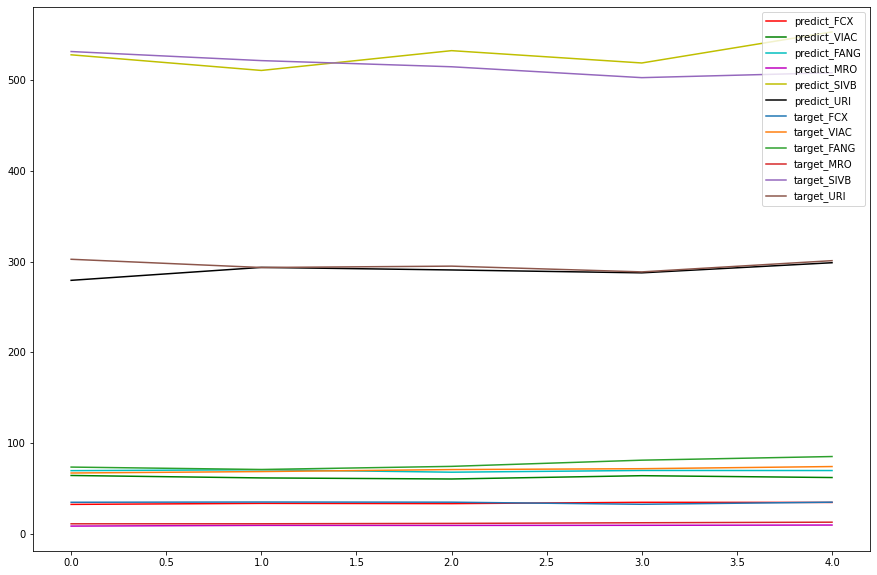

In [65]:
plt.figure(figsize = (15,10))

companies_to_show = [0,1,2,3,4,5] 


    
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company])) #only to place the label

   

for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show()

### Predicting all the data to see how the model reacts to Train and Test set

In [66]:
X_all,y_all = processData(array,look_back,forward_days,num_companies,forward_days)
y_all = np.array([list(a.ravel()) for a in y_all])

In [67]:
Xt = model.predict(X_all)
Xt.shape

(47, 50)

In [68]:
Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(10, 47, 5)

In [69]:
Yt = do_inverse_transform(y_all)

MT = target_by_company(Yt, num_companies)
MT.shape

(10, 235)

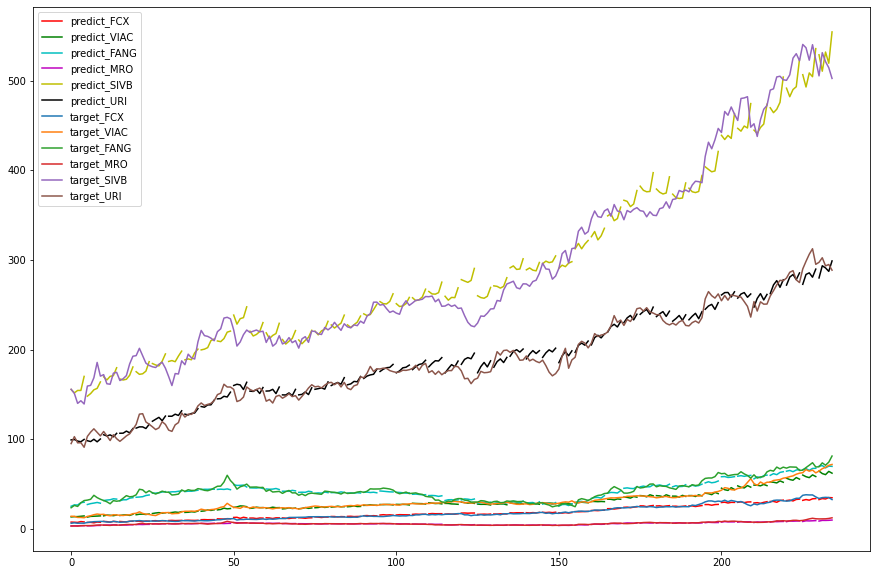

In [70]:
plt.figure(figsize = (15,10))

companies_to_show = [0,1,2,3,4,5]


    
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company])) #only to place the label

   

for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show()